In [12]:
#Task_2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
df = pd.read_csv("F:/prodigy/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      

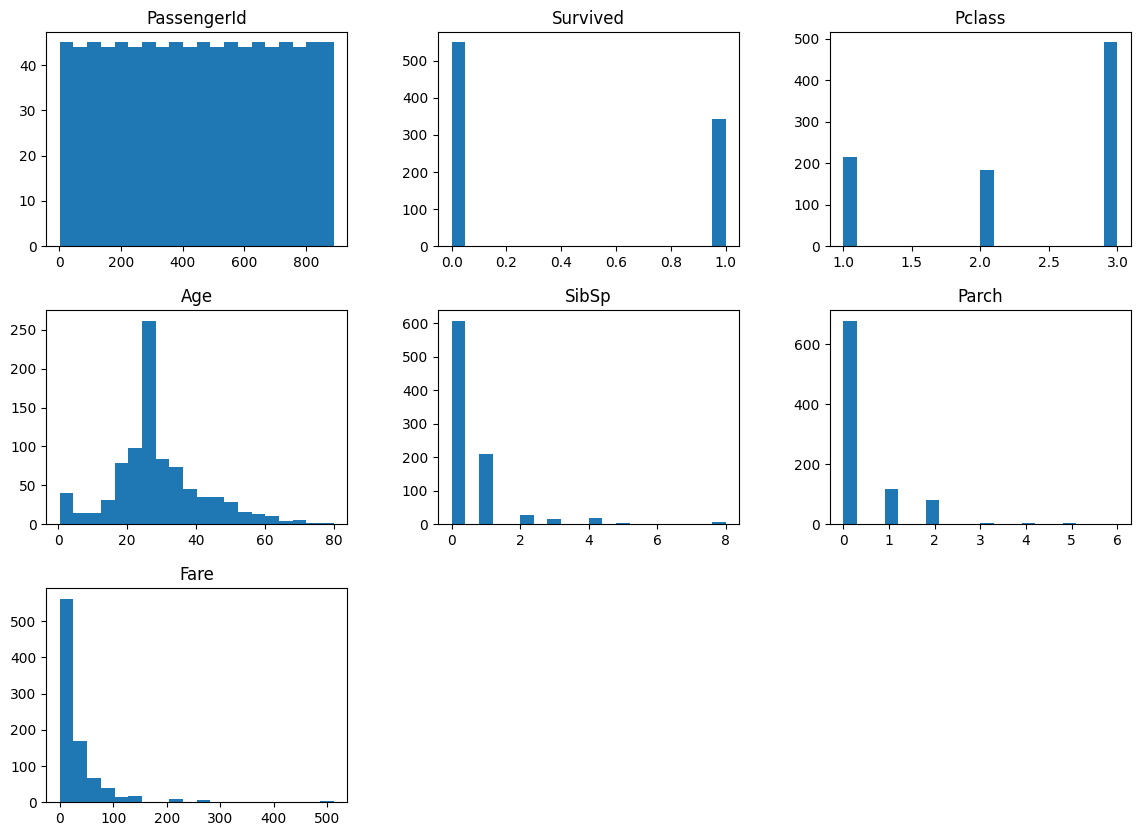

In [15]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Fare'], inplace=True)
print(df.isnull().sum())
print(df.describe())
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.show()

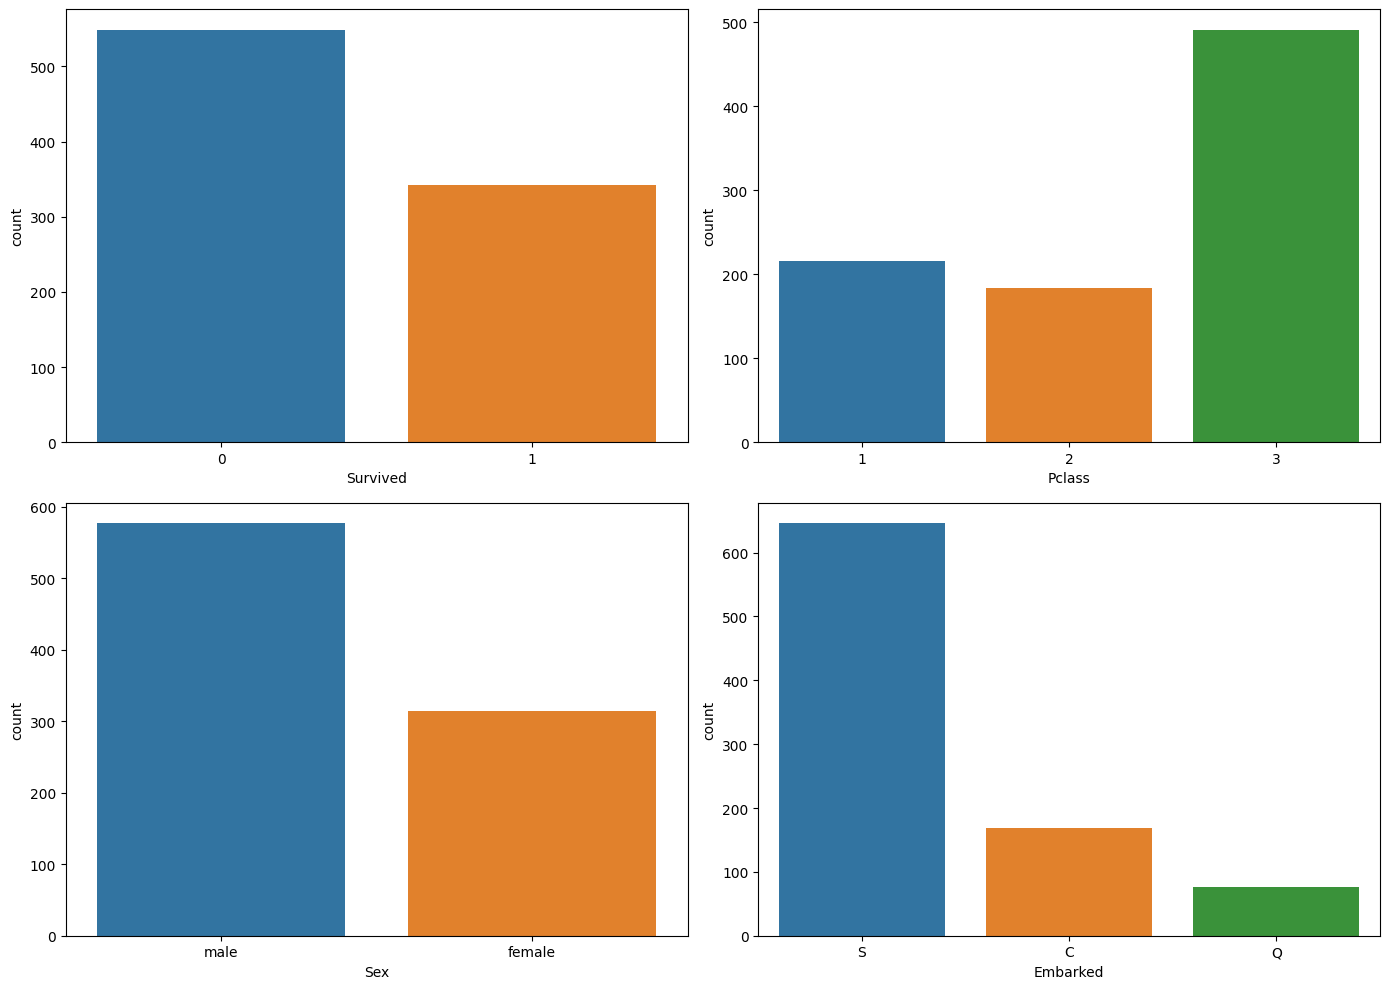

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
sns.countplot(x='Sex', data=df, ax=axes[1, 0])
sns.countplot(x='Embarked', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

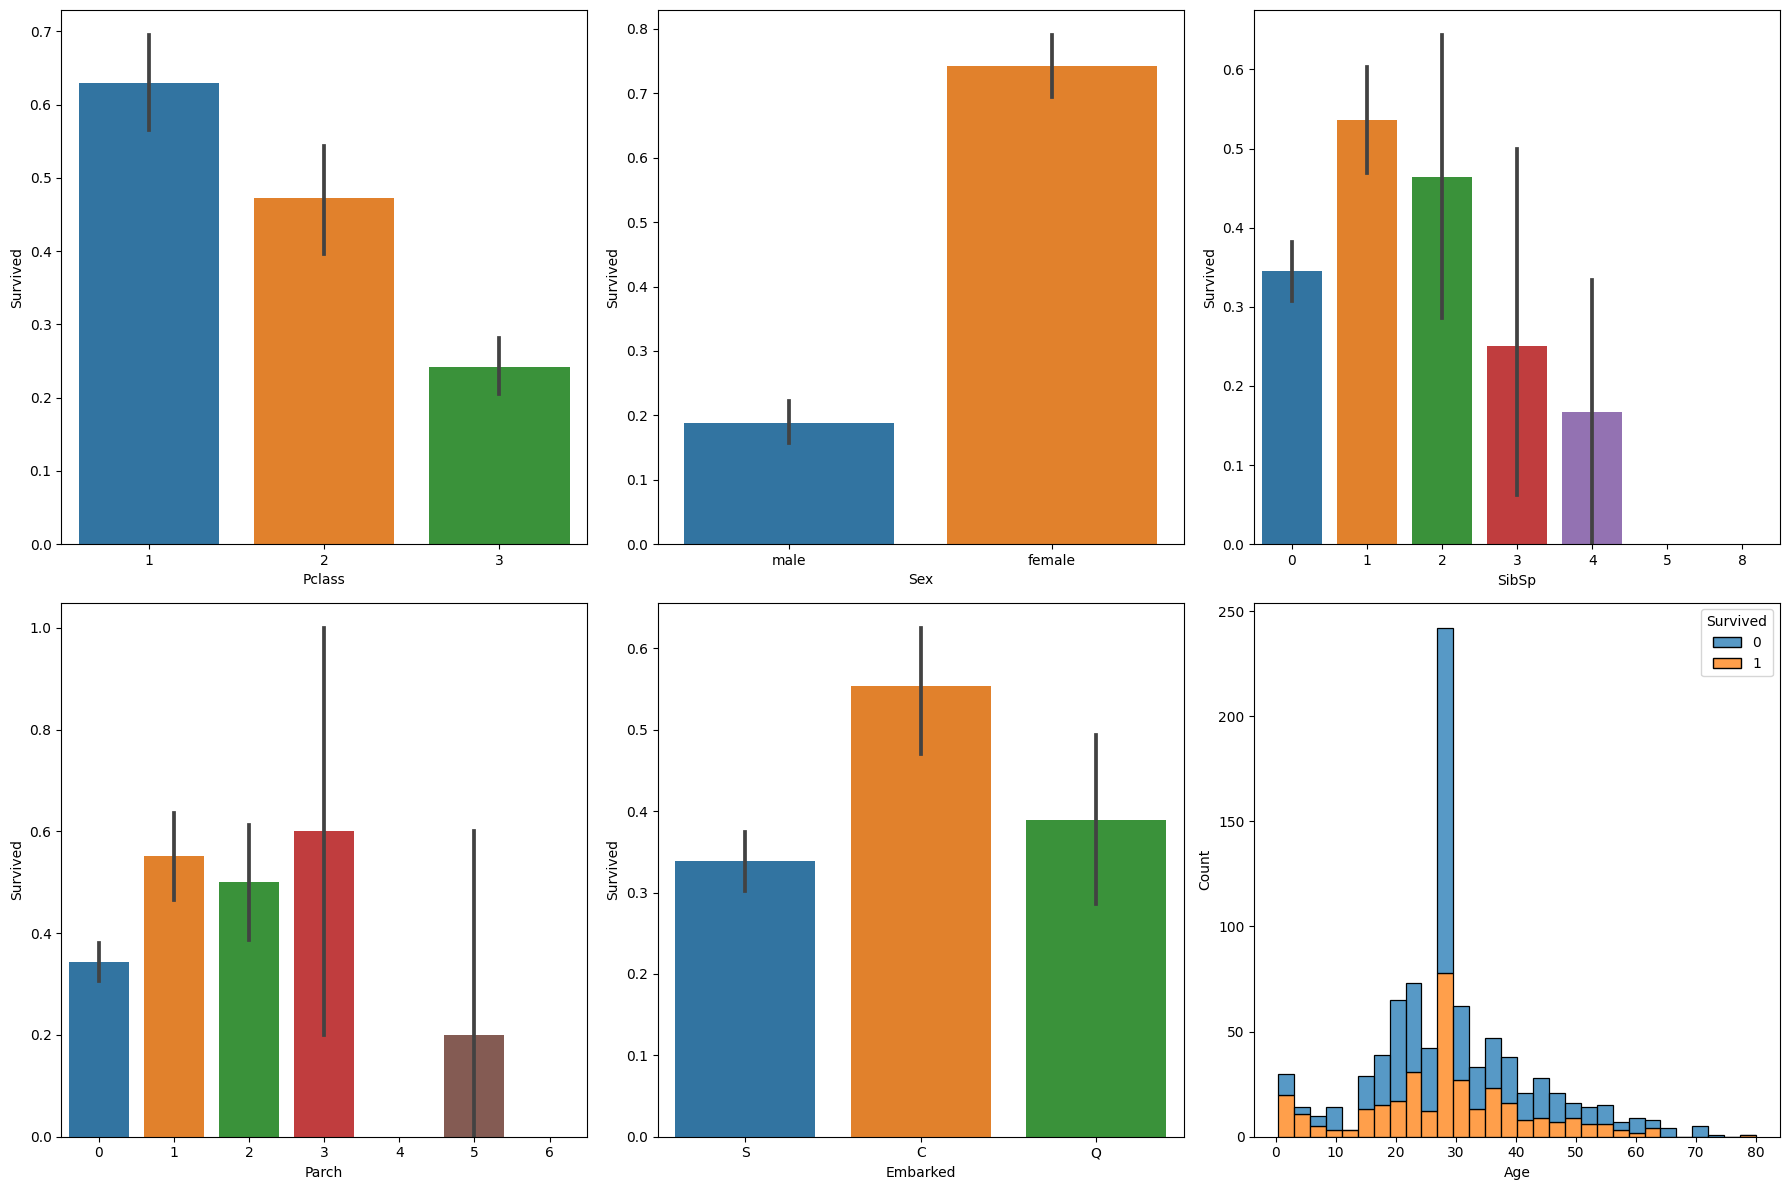

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='SibSp', y='Survived', data=df, ax=axes[0, 2])
sns.barplot(x='Parch', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1, 1])
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', ax=axes[1, 2])
plt.tight_layout()
plt.show()

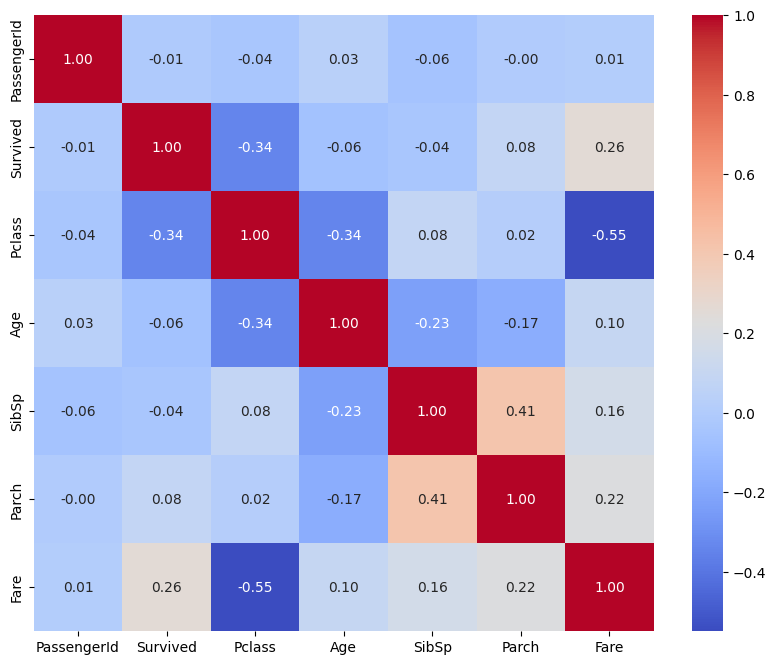

In [11]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.dropna()
numeric_df = numeric_df.fillna(0)
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()